In [13]:
# Imports
import pandas as pd
import statistics as sts

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from yellowbrick.classifier import ConfusionMatrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset
df = pd.read_csv('datasets/processed.cleveland.data')

# Exploratory Analysis

In [3]:
# Data dimensions
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Número de linhas: 302
Número de colunas: 14


In [24]:
# Descriptive statistics
df.describe()

,Age,Sex,Chest Pain,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [29]:
# data types
df.dtypes

Age           float64
Sex           float64
Chest Pain    float64
Trestbps      float64
Chol          float64
Fbs           float64
Restecg       float64
Thalach       float64
Exang         float64
Oldpeak       float64
Slope         float64
Ca             object
Thal           object
Num             int64
dtype: object

# Data cleaning

In [4]:
# data transformation
df.loc[df['Ca'] == '?', 'Ca'] = sts.mode(df['Ca'])
df.loc[df['Thal'] == '?', 'Thal'] = sts.mode(df['Thal'])

In [5]:
# Changing column types
df['Ca'] = df['Ca'].astype(float)
df['Thal'] = df['Thal'].astype(float)

df.dtypes

Age           float64
Sex           float64
Chest Pain    float64
Trestbps      float64
Chol          float64
Fbs           float64
Restecg       float64
Thalach       float64
Exang         float64
Oldpeak       float64
Slope         float64
Ca            float64
Thal          float64
Num             int64
dtype: object

In [25]:
# Cheking for missing values
df.isnull().values.any()

False

In [6]:
# Separating features and target variable
X = df.iloc[:, 0:13]
y = df.iloc[:, -1]

In [7]:
# Normalized data with the Min-Max technique

X = (X - X.min()) / (X.max() - X.min())

X.head()

,Age,Sex,Chest Pain,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00


In [8]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Models Generation

## Naive Bayes

In [9]:
# Create a Gaussian Classifier
gnb = GaussianNB()

In [10]:
# Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.5274725274725275
Confusion Matrix: 
 [[45  6  1  0  3]
 [ 6  1  1  2  8]
 [ 0  1  0  1  3]
 [ 0  0  4  0  5]
 [ 0  2  0  0  2]]


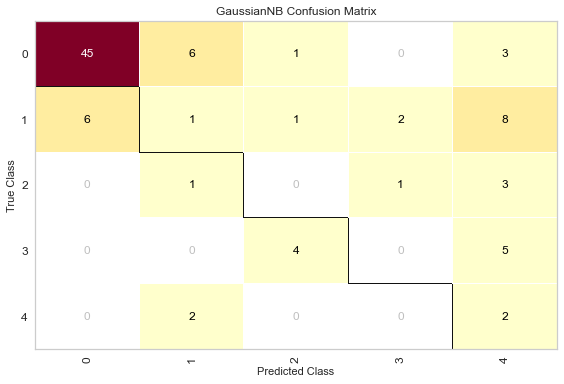

In [14]:
# Confusion Matrix with yellowbrick
v = ConfusionMatrix(GaussianNB())
v.fit(X_train, y_train)
v.score(X_test, y_test)
v.poof()

# Linear Discriminant

In [15]:
# Create a Linear Discriminant Classifier
clf = LinearDiscriminantAnalysis()

In [16]:
# Train the model using the training sets
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [17]:
# Predict the response for test dataset
y_pred = []
for i in X_test.values:
    y_pred.append(int(clf.predict(i.reshape(1, -1))))

# Model Accuracy
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.6043956043956044
Confusion Matrix: 
 [[49  3  1  0  2]
 [ 6  2  5  4  1]
 [ 1  0  3  1  0]
 [ 0  1  2  1  5]
 [ 1  1  2  0  0]]


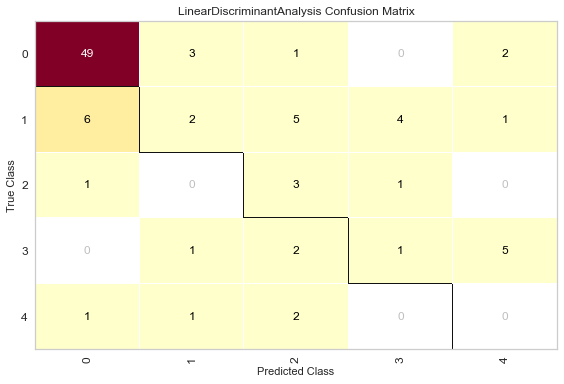

In [18]:
# Confusion Matrix with yellowbrick
v = ConfusionMatrix(LinearDiscriminantAnalysis())
v.fit(X_train, y_train)
v.score(X_test, y_test)
v.poof()